<a href="https://colab.research.google.com/github/stefymojica/MACC/blob/main/agentes_riqueza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
%pip install mesa --quiet
%pip install seaborn --quiet


In [27]:
import mesa
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [28]:
print(mesa.__version__)

3.2.0


In [63]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1
        #self.wealth = 5

    def exchange(self):
        # Verify agent has some wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                  other_agent.wealth += 1  # ?
                  self.wealth -= 1  # ?


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n):
        super().__init__()
        self.num_agents = n

        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

        self.wealth_history=[]
        self.zero_wealth_history=[]

    def step(self):
        """Advance the model by one step."""

        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("exchange")

        total_wealth = sum(a.wealth for a in self.agents)
        self.wealth_history.append(total_wealth)

        zero_wealth_history = sum(a.wealth == 0 for a in self.agents)
        self.zero_wealth_history.append(zero_wealth_history)

In [54]:
model = MoneyModel(10)
for _ in range(15):
    model.step()

## Conservacion de la riqueza

Verifique si la riqueza total del modelo
se conserva en cada paso de la simulación y represente el resultado en
una grafica.



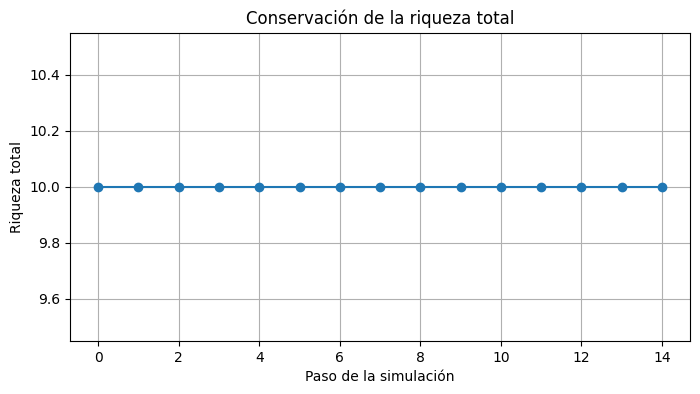

In [53]:
plt.figure(figsize=(8, 4))
plt.plot(model.wealth_history, marker="o")
plt.title("Conservación de la riqueza total")
plt.xlabel("Paso de la simulación")
plt.ylabel("Riqueza total")
plt.grid(True)
plt.show()

## Sensibilidad a la riqueza inicial

Ejecute el modelo con diferentes
valores de riqueza inicial. Analice y explique qué aspectos de la dinámica cambian en cada caso

In [64]:
model = MoneyModel(10)
for _ in range(15):
    model.step()

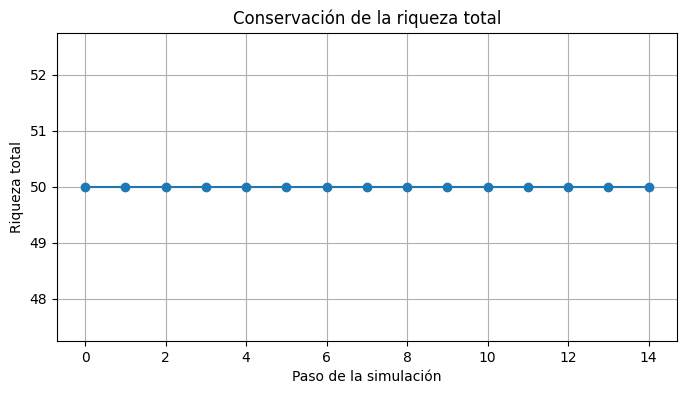

In [60]:
plt.figure(figsize=(8, 4))
plt.plot(model.wealth_history, marker="o")
plt.title("Conservación de la riqueza total")
plt.xlabel("Paso de la simulación")
plt.ylabel("Riqueza total")
plt.grid(True)
plt.show()

En el diagrama se puede evidenciar que la riqueza sigue conservandose independienntemente que el valor de riqueza inicial sea 5 en este caso, ya que la riqueza total en todos los pasos son 50

## Agentes sin riqueza

Monitoree a lo largo del tiempo cuántos agentes
alcanzan una riqueza igual a cero y represente la evolución en una
grafica.

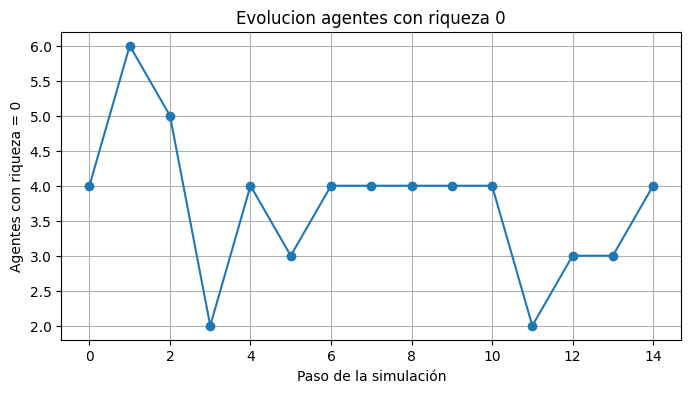

In [67]:
plt.figure(figsize=(8, 4))
plt.plot(model.zero_wealth_history, marker="o")
plt.title("Evolucion agentes con riqueza 0")
plt.xlabel("Paso de la simulación")
plt.ylabel("Agentes con riqueza = 0")
plt.grid(True)
plt.show()

## Transacción con costo

Simule un escenario más realista donde las
transacciones tienen un costo. En este caso, el agente que da pierde
-1, mientras que el agente que recibe gana +0.9. Verifique si la riqueza
total del sistema permanece conservada en cada paso.

In [71]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1
        self.tax = 0
        #self.wealth = 5

    def exchange(self):
        # Verify agent has some wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                  other_agent.wealth += 0.95  # ?
                  self.wealth -= 1  # ?


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n):
        super().__init__()
        self.num_agents = n

        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

        self.wealth_history=[]
        self.zero_wealth_history=[]

    def step(self):
        """Advance the model by one step."""

        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("exchange")

        total_wealth = sum(a.wealth for a in self.agents)
        self.wealth_history.append(total_wealth)

        zero_wealth_history = sum(a.wealth == 0 for a in self.agents)
        self.zero_wealth_history.append(zero_wealth_history)

In [69]:
model = MoneyModel(10)
for _ in range(15):
    model.step()

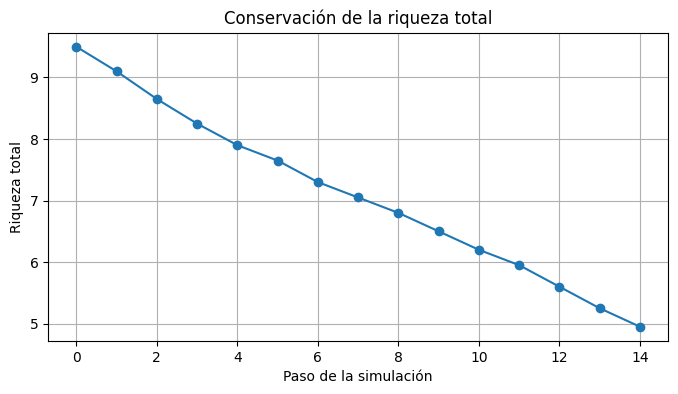

In [70]:
plt.figure(figsize=(8, 4))
plt.plot(model.wealth_history, marker="o")
plt.title("Conservación de la riqueza total")
plt.xlabel("Paso de la simulación")
plt.ylabel("Riqueza total")
plt.grid(True)
plt.show()

Se evidencia en la grafica, que la riqueza total de va disminuyendo a medida que transcurren los pasos

## Extensión del modelo

Proponga una modicación adicional al modelo (por ejemplo: impuestos, ahorro parcial, límites en la transferencia,
etc.) y analice sus implicaciones en la dinámica.

In [75]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1
        #self.wealth = 5
        self.tax = 0

    def exchange(self):
        # Verify agent has some wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                  other_agent.wealth += 0.95  # ?
                  self.wealth -= 1  # ?
                  self.tax += 0.05


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n):
        super().__init__()
        self.num_agents = n

        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

        self.wealth_history=[]
        self.zero_wealth_history=[]
        self.tax_history=[]

    def step(self):
        """Advance the model by one step."""

        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("exchange")

        total_wealth = sum(a.wealth for a in self.agents)
        self.wealth_history.append(total_wealth)

        zero_wealth_history = sum(a.wealth == 0 for a in self.agents)
        self.zero_wealth_history.append(zero_wealth_history)

        total_tax = sum(a.tax for a in self.agents)
        self.tax_history.append(total_tax)

In [76]:
model = MoneyModel(10)
for _ in range(15):
    model.step()

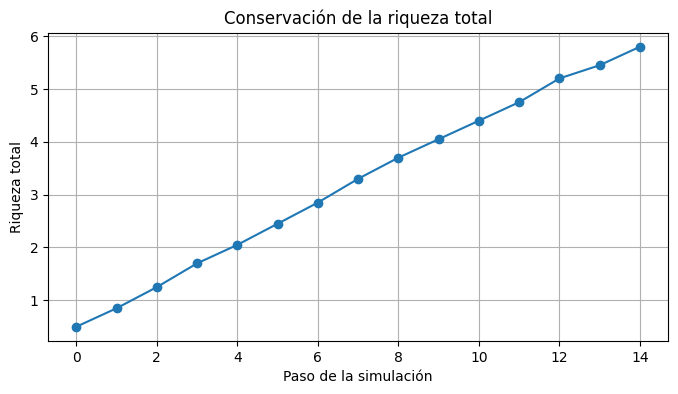

In [78]:
plt.figure(figsize=(8, 4))
plt.plot(model.tax_history, marker="o")
plt.title("Conservación de la riqueza total")
plt.xlabel("Paso de la simulación")
plt.ylabel("Riqueza total")
plt.grid(True)
plt.show()

La modificacion del modelo, es evidenciar el aumento en la riqueza de los bancos o las entiades que ahorran el dinero de la diferencia cuando se realiza una transaccion.